# Graduate Admission Probabilities

In this dataset, the relevant columns are:
* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

Project Overview:
* EDA comparing the numerical columns to the university ranking
* Data model that predicts the graduate admission probability with MAE ~4%
* Optimized Linear, Lasso, and Random Forest Regressors using GridsearchCV to reach the best model.

Data Credit: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [80]:
#Import the usual packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')

# Data Exploration and Cleaning

In [82]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [83]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [84]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


(500, 9)

We have the dream code with no null values!
Convert CGPA to the 4.0 scale for reference

In [85]:
df['gpa'] = df.CGPA / 2.5
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,gpa
0,1,337,118,4,4.5,4.5,9.65,1,0.92,3.860
1,2,324,107,4,4.0,4.5,8.87,1,0.76,3.548
2,3,316,104,3,3.0,3.5,8.00,1,0.72,3.200
3,4,322,110,3,3.5,2.5,8.67,1,0.80,3.468
4,5,314,103,2,2.0,3.0,8.21,0,0.65,3.284


# EDA

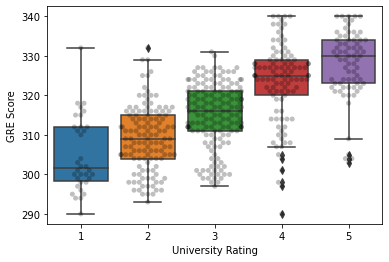

In [86]:
sns.boxplot(x=df['University Rating'],y=df['GRE Score'])
sns.swarmplot(x=df['University Rating'],y=df['GRE Score'],color='black',alpha=0.25)

Higher GRE scores for higher rated universities, no surprise.

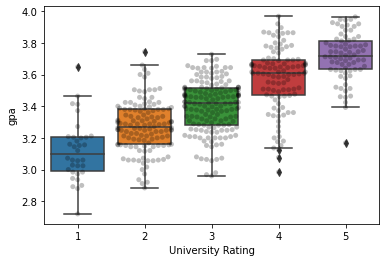

In [87]:
sns.boxplot(x=df['University Rating'],y=df['gpa'])
sns.swarmplot(x=df['University Rating'],y=df['gpa'],color='black',alpha=0.25)

Higher gpa for higher rated universities, no surprise.Although we can also look at how high the bottom quartiles are for gpa at the higher university ratings.

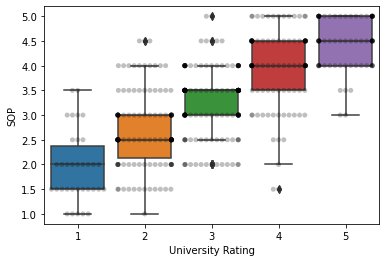

In [88]:
sns.boxplot(x=df['University Rating'],y=df['SOP'])
sns.swarmplot(x=df['University Rating'],y=df['SOP'],color='black',alpha=0.25)

It seems like a decent SOP can get you into a university of rank 4 or less, but at 5 you need a pretty strong recommendation.

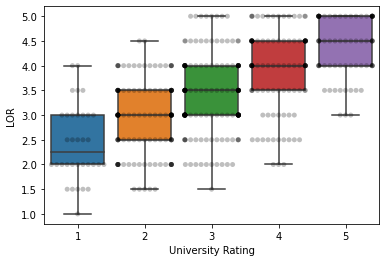

In [89]:
sns.boxplot(x=df['University Rating'],y=df['LOR '])
sns.swarmplot(x=df['University Rating'],y=df['LOR '],color='black',alpha=0.25)

Like the SOP, it seems like a decent LOR can get you into a university of rank 4 or less, but at 5 you need a pretty strong recommendation.

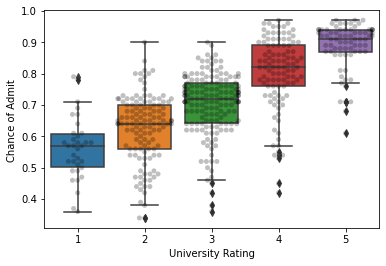

In [90]:
sns.boxplot(x=df['University Rating'],y=df['Chance of Admit '])
sns.swarmplot(x=df['University Rating'],y=df['Chance of Admit '],color='black',alpha=0.25)

The study of 500 students seems to have picked students who have profiles that would have higher chances of admits at high ranked schools.

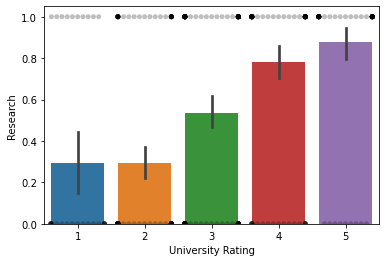

In [91]:
sns.barplot(x=df['University Rating'],y=df['Research'])
sns.swarmplot(x=df['University Rating'],y=df['Research'],color='black',alpha=0.25)

The higher the university rating, the higher the chances of admits having research experience.

In [93]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'gpa'],
      dtype='object')

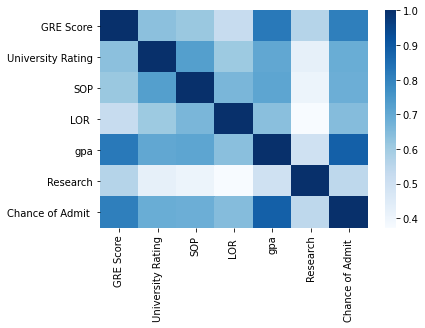

In [106]:
sns.heatmap(df[['GRE Score','University Rating','SOP','LOR ','gpa','Research','Chance of Admit ']].corr(),cmap='Blues')

# Data Modeling

In [109]:
#Import the usual data modeling packages
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit '].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     298.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.16e-183
Time:                        07:27:33   Log-Likelihood:                 712.12
No. Observations:                 500   AIC:                            -1406.
Df Residuals:                     491   BIC:                            -1368.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3380      0.103    -12.982      0.000      -1.540      -1.136
Serial No.          8.68e-05   1.87e-05      4.641      0.000    5.01e-05       0.000
GRE Score             0.0019      0.000      3.903      0.000       0.001       0.003
TOEFL Score           0.0032      0.001      3.715      0.000       0.002       0.005
University Rating     0.0053      0.004      1.426      0.154      -0.002       0.013
SOP                   0.0046      0.005      1.011      0.312      -0.004       0.013
LOR                   0.0149      0.004      3.660      0.000       0.007       0.023
CGPA                  0.0996      0.008     12.128      0.000       0.083       0.116
Research              0.0225      0.006      3.474      0.001       0.010       0.035
gpa                   0.0398      0.003     12.128      0.000       0.033       0.046
==============================================================================
Omnibus:                       83.052   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.947
Skew:                          -0.942   Prob(JB):                     3.06e-35
Kurtosis:                       5.020   Cond. No.                     6.58e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [115]:
lm = LinearRegression()
lm.fit(X_train,y_train)

cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)

array([-0.04690557, -0.04273124, -0.0460889 , -0.04394294, -0.03875263])

In [116]:
lm_l = Lasso()
lm_l.fit(X_train,y_train)
cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)

array([-0.0943164 , -0.08540949, -0.10255347, -0.09814043, -0.10805386])

In [118]:
rf = RandomForestRegressor()
cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error',cv=5)

array([-0.03954125, -0.04572375, -0.0399075 , -0.0385375 , -0.0453575 ])

In [120]:
parameters = {'n_estimators':range(10,300,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [122]:
print(gs.best_score_)
print(gs.best_estimator_)

-0.041083166666666664
RandomForestRegressor(max_features='log2', n_estimators=150)


In [127]:
pred_lm = lm.predict(X_test)
pred_lml = lm_l.predict(X_test)
pred_rf = gs.best_estimator_.predict(X_test)

print('MAE for Linear Regression:',mean_absolute_error(y_test,pred_lm))
print('MAE for Lasso Regression:',mean_absolute_error(y_test,pred_lml))
print('MAE for Random Forest Regressor:',mean_absolute_error(y_test,pred_rf))

#See if two models together perform better
print('MAE of Linear Regression combined with random Forest Regressor:',mean_absolute_error(y_test, (pred_lm+pred_rf)/2))

MAE for Linear Regression: 0.043258852595452806
MAE for Lasso Regression: 0.09778092464792407
MAE for Random Forest Regressor: 0.039954666666666715
MAE of Linear Regression combined with random Forest Regressor: 0.03985852268528539
